In [6]:
import sys, os
print(sys.executable)
print(os.getcwd())

C:\Users\chenr\miniforge3\envs\astropy\python.exe
C:\Users\chenr\OneDrive\Desktop\phys-134-proj


In [7]:
rootfolder=os.getcwd().replace('\\','/')
print(rootfolder)

C:/Users/chenr/OneDrive/Desktop/phys-134-proj


In [8]:
os.chdir(f"{rootfolder}/lco_data-20251202-36")
os.getcwd()

'C:\\Users\\chenr\\OneDrive\\Desktop\\phys-134-proj\\lco_data-20251202-36'

In [9]:
# we need the RA/DEC data from each observation and translate it to pixel coordinates.
import pickle
#load from pickle
with open('merged_data.pkl', 'rb') as f:
    merged_data = pickle.load(f)
#recall that the keys are the valid observations

Set OBSGEO-B to    28.300308 from OBSGEO-[XYZ].
Set OBSGEO-H to     2386.994 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -30.167703 from OBSGEO-[XYZ].
Set OBSGEO-H to     2197.994 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to    30.680041 from OBSGEO-[XYZ].
Set OBSGEO-H to     2026.994 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to    20.706969 from OBSGEO-[XYZ].
Set OBSGEO-H to     3033.997 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to    28.300308 from OBSGEO-[XYZ].
Set OBSGEO-H to     2386.995 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -32.380633 from OBSGEO-[XYZ].
Set OBSGEO-H to     1756.994 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -31.272819 from OBSGEO-[XYZ].
Set OBSGEO-H to     1126.993 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [10]:
merged_data[list(merged_data.keys())[0]]

{'icrs': {'ra': array([77.96901145, 78.00383066, 77.98107419, 78.08611895, 77.67491618,
         77.75851002, 77.83228109, 77.64550192, 77.7778916 , 77.79665041,
         77.74453099, 78.02132324, 78.03735253, 77.99115373, 77.826763  ]),
  'dec': array([18.03399294, 18.03051053, 18.11159006, 18.13817795, 18.08610803,
         18.11167927, 18.3110055 , 18.29675712, 18.31631118, 18.41226387,
         18.41350691, 18.29639713, 18.32767694, 18.33238649, 18.41757886])},
 'image': {'x': array([ 674.51008,  515.45897,  618.67282,  137.7245 , 2021.3085 ,
         1637.122  , 1299.9491 , 2154.6617 , 1548.8365 , 1462.3786 ,
         1700.4093 ,  435.45068,  361.83888,  573.49969, 1324.5271 ]),
  'y': array([ 325.71172,  308.99125,  699.70433,  826.61105,  578.00791,
          700.31366, 1661.0504 , 1593.8816 , 1686.4079 , 2149.6571 ,
         2155.6244 , 1590.5307 , 1741.6414 , 1763.3525 , 2172.8186 ])},
 'nddata': NDData([[ 4.7827606 ,  0.3642283 , -0.9027024 , ...,  0.6471738 ,
           0.69

In [11]:
import numpy as np
datetime_strs, counts, count_errors = [], [], []
for filename in merged_data.keys():
    datetime_strs.append(merged_data[filename]['datetime_str'])
    counts.append(merged_data[filename]['asteroid_flux_normadj'])
    count_errors.append(merged_data[filename]['asteroid_flux_normadj_sigma'])
print(datetime_strs)
counts_np = np.array(counts)
count_errors_np = np.array(count_errors)
print(counts_np)
print(count_errors_np)

['2025-Nov-25 02:00:14.936', '2025-Nov-25 05:00:13.688', '2025-Nov-25 05:36:42.454', '2025-Nov-25 06:06:14.909', '2025-Nov-25 07:45:12.840', '2025-Nov-25 08:30:09.718', '2025-Nov-25 09:06:12.841', '2025-Nov-25 10:06:14.367', '2025-Nov-25 11:06:18.072', '2025-Nov-25 12:47:39.526', '2025-Nov-25 13:06:13.287', '2025-Nov-25 14:06:15.196', '2025-Nov-25 23:02:40.929', '2025-Nov-25 23:35:17.210', '2025-Nov-26 00:55:17.907', '2025-Nov-26 01:55:17.940', '2025-Nov-26 02:10:07.425', '2025-Nov-26 03:06:19.581', '2025-Nov-26 05:35:14.393', '2025-Nov-26 06:06:06.084', '2025-Nov-26 07:59:44.591', '2025-Nov-26 08:06:06.512', '2025-Nov-26 11:06:14.445', '2025-Nov-26 12:06:12.274', '2025-Nov-26 13:06:14.392', '2025-Nov-26 14:06:13.681', '2025-Nov-26 15:14:48.233', '2025-Nov-26 23:00:14.461', '2025-Nov-26 23:35:15.525', '2025-Nov-27 04:59:38.384', '2025-Nov-27 05:06:21.675', '2025-Nov-27 07:44:42.254', '2025-Nov-27 08:06:11.940']
[ 99589.73559374  99908.15214798  99141.77117302 101139.75292607
  99517.95

Convert Time to machine readable format

In [12]:
import pandas as pd
time_nums = pd.to_datetime(datetime_strs)
time_nums

DatetimeIndex(['2025-11-25 02:00:14.936000', '2025-11-25 05:00:13.688000',
               '2025-11-25 05:36:42.454000', '2025-11-25 06:06:14.909000',
               '2025-11-25 07:45:12.840000', '2025-11-25 08:30:09.718000',
               '2025-11-25 09:06:12.841000', '2025-11-25 10:06:14.367000',
               '2025-11-25 11:06:18.072000', '2025-11-25 12:47:39.526000',
               '2025-11-25 13:06:13.287000', '2025-11-25 14:06:15.196000',
               '2025-11-25 23:02:40.929000', '2025-11-25 23:35:17.210000',
               '2025-11-26 00:55:17.907000', '2025-11-26 01:55:17.940000',
               '2025-11-26 02:10:07.425000', '2025-11-26 03:06:19.581000',
               '2025-11-26 05:35:14.393000', '2025-11-26 06:06:06.084000',
               '2025-11-26 07:59:44.591000', '2025-11-26 08:06:06.512000',
               '2025-11-26 11:06:14.445000', '2025-11-26 12:06:12.274000',
               '2025-11-26 13:06:14.392000', '2025-11-26 14:06:13.681000',
               '2025-11-2

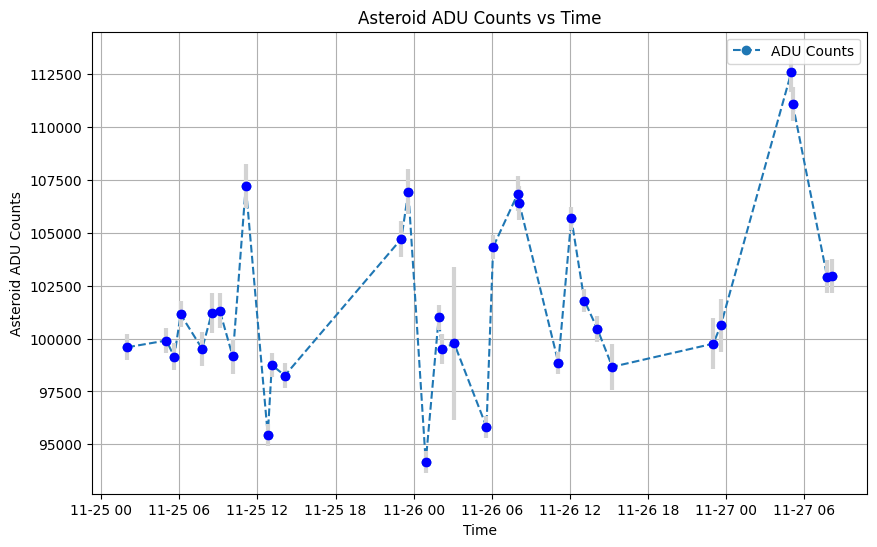

In [13]:
#plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(time_nums, counts, marker='o', linestyle='--', label='ADU Counts')
#add error bars
plt.errorbar(time_nums, counts, yerr=count_errors, fmt='o', color='blue', ecolor='lightgray', elinewidth=3, capsize=0)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Asteroid ADU Counts')
plt.title('Asteroid ADU Counts vs Time')
plt.grid(True)
plt.show()

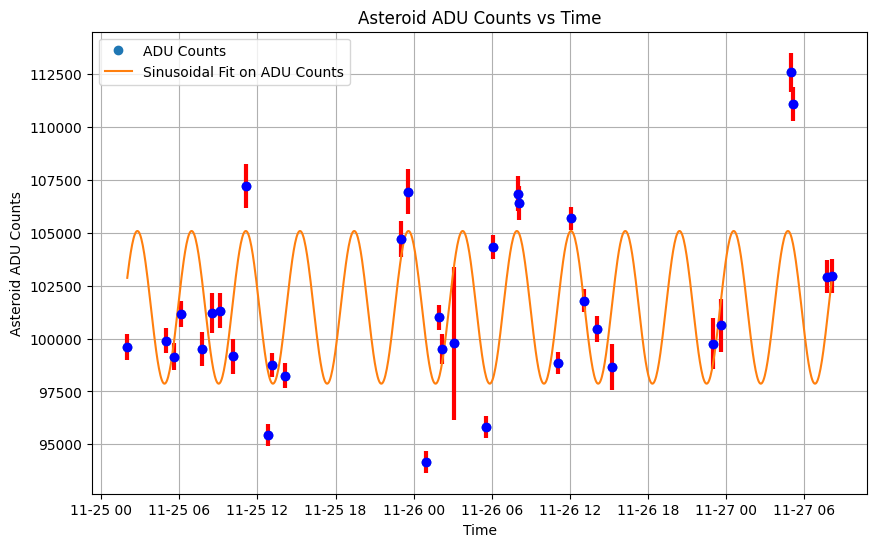

Chi-squared: 649.239294678493
Degrees of freedom: 29
P-value: 0.0
Guess Parameters:
Amplitude Guess: 11949.704200402819
Period Guess: 4.0 hours
Mean Guess: 100638.71018038636

Fitted Parameters:
Fitted Amplitude: 3609.5936199244607
Fitted Period: 4.162669382830616 hours
Fitted Phase: 0.3965850265871506 radians
Fitted Mean: 101476.6094409801

Fitted Parameter Sum of Squares:
Amplitude Variance: 31089.235005113595
Period Variance: 1.1507575788727271e-07
Phase Variance: 0.007105216897514977
Mean Variance: 16962.91597329611


In [14]:
# run a sinusoidal fit to the data: y_ij ~ A sin(2 pi f t_i + phi) + mu
from scipy.optimize import curve_fit
def sinusoidal(t, A, T, phi, mu):
    return A * np.sin(2 * np.pi * t / T + phi) + mu

#convert time_nums to numerical values in days since first observation
time_nums_days = (time_nums - time_nums[0]).total_seconds() / 86400.0

#fit
amplitude_guess = np.max(counts_np) - np.median(counts_np)
mean_guess = np.median(counts_np)
period_days_guess = 4.0 / 24  # 4 hours in days

popt, pcov = curve_fit(sinusoidal, time_nums_days, counts_np, p0=[amplitude_guess, period_days_guess, 0.0, mean_guess], sigma=count_errors_np, absolute_sigma=True)
A_fit, T_fit, phi_fit, mu_fit = popt
A_fit, T_fit, phi_fit, mu_fit

plt.figure(figsize=(10,6))
plt.plot(time_nums, counts_np, marker='o', linestyle='', label='ADU Counts')
#add error bars
plt.errorbar(time_nums, counts_np, yerr=count_errors_np, fmt='o', color='blue', ecolor='red', elinewidth=3, capsize=0)
#plot the fit
t_fit = np.linspace(min(time_nums_days), max(time_nums_days), 1000)
flux_fit = sinusoidal(t_fit, *popt)
plt.plot(time_nums[0] + pd.to_timedelta(t_fit, unit='D'), flux_fit, '-', label='Sinusoidal Fit on ADU Counts')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Asteroid ADU Counts')
plt.title('Asteroid ADU Counts vs Time')
plt.grid(True)
plt.show()

from scipy.stats import chi2
#chi squared statistic and p-value
residuals = counts_np - sinusoidal(time_nums_days, *popt)
chi_squared = np.sum((residuals / count_errors_np) ** 2)
dof = len(counts_np) - len(popt)
p_value = 1 - chi2.cdf(chi_squared, dof)

print(f"Chi-squared: {chi_squared}")
print(f"Degrees of freedom: {dof}")
print(f"P-value: {p_value}")

print("Guess Parameters:")
print(f"Amplitude Guess: {amplitude_guess}")
print(f"Period Guess: {24*period_days_guess} hours")
print(f"Mean Guess: {mean_guess}")

#show fit parameters
print("\nFitted Parameters:")
print(f"Fitted Amplitude: {A_fit}")
print(f"Fitted Period: {24*T_fit} hours")
print(f"Fitted Phase: {phi_fit} radians")
print(f"Fitted Mean: {mu_fit}")

#get variance of parameters from covariance matrix
perr = np.diag(pcov)
print("\nFitted Parameter Sum of Squares:")
print(f"Amplitude Variance: {perr[0]}")
print(f"Period Variance: {perr[1]}")
print(f"Phase Variance: {perr[2]}")
print(f"Mean Variance: {perr[3]}")

## Elogated "Double Peak", second order:


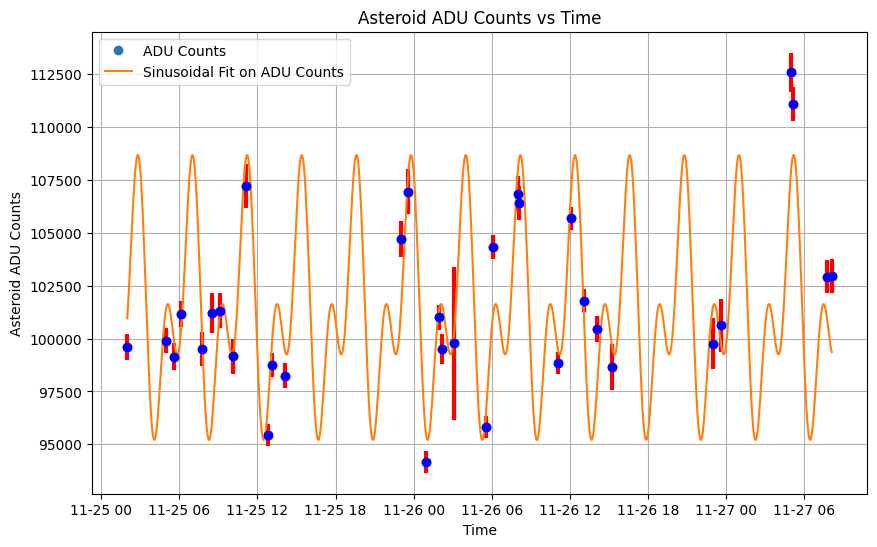

Chi-squared: 226.82860844825512
Degrees of freedom: 27
P-value: 0.0
Guess Parameters:
Amplitude Guess: 11949.704200402819
Second Amplitude Guess: 5974.8521002014095
Period Guess: 4.0 hours
Mean Guess: 100638.71018038636
First Phase Guess: 0.0
Second Phase Guess: 0.0

Fitted Parameters:
Fitted Amplitude: 4127.089542019405
Fitted Second Amplitude: 3665.294128474405
Fitted Period: 4.196333432047995 hours
Fitted Phase 1: 0.7700557641375404 radians
Fitted Phase 2: 5.192768748578663 radians
Fitted Mean: 101333.34429653891

Fitted Parameter Sum of Squares:
Amplitude Variance: 30320.869599200432
Second Amplitude Variance: 35808.818423004894
Period Variance: 4.665534784426441e-08
First Phase Variance: 0.003695613405486052
Second Phase Variance: 0.00982284062198174
Mean Variance: 18213.284462453586


In [16]:
from scipy.optimize import curve_fit
def secondorder(t, A, B, T, phi1 , phi2, mu):
    return A * np.sin(2 * np.pi * t / T + phi1) + B * np.sin(4 * np.pi * t / T + phi2) + mu

#convert time_nums to numerical values in days since first observation
time_nums_days = (time_nums - time_nums[0]).total_seconds() / 86400.0

#fit
amplitude_guess = np.max(counts_np) - np.median(counts_np)
mean_guess = np.median(counts_np)
period_days_guess = 4.0 / 24  # 4 hours in days
p0=[amplitude_guess, 
    amplitude_guess/2, 
    period_days_guess, 
    0.0, 
    0.0,
    mean_guess]

popt, pcov = curve_fit(secondorder, time_nums_days, counts_np, 
                       p0, sigma=count_errors_np, absolute_sigma=True)
A_fit, B_fit, T_fit, phi1_fit, phi2_fit, mu_fit = popt

plt.figure(figsize=(10,6))
plt.plot(time_nums, counts_np, marker='o', linestyle='', label='ADU Counts')
#add error bars
plt.errorbar(time_nums, counts_np, yerr=count_errors_np, fmt='o', color='blue', ecolor='red', elinewidth=3, capsize=0)
#plot the fit
t_fit = np.linspace(min(time_nums_days), max(time_nums_days), 1000)
flux_fit = secondorder(t_fit, *popt)
plt.plot(time_nums[0] + pd.to_timedelta(t_fit, unit='D'), flux_fit, '-', label='Sinusoidal Fit on ADU Counts')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Asteroid ADU Counts')
plt.title('Asteroid ADU Counts vs Time')
plt.grid(True)
plt.show()

#tests
from scipy.stats import chi2
#chi squared statistic and p-value
residuals = counts_np - secondorder(time_nums_days, *popt)
chi_squared = np.sum((residuals / count_errors_np) ** 2)
dof = len(counts_np) - len(popt)
p_value = 1 - chi2.cdf(chi_squared, dof)

print(f"Chi-squared: {chi_squared}")
print(f"Degrees of freedom: {dof}")
print(f"P-value: {p_value}")

print("Guess Parameters:")
print(f"Amplitude Guess: {p0[0]}")
print(f"Second Amplitude Guess: {p0[1]}")
print(f"Period Guess: {24*p0[2]} hours")
print(f"Mean Guess: {p0[5]}")
print(f"First Phase Guess: {p0[3]}")
print(f"Second Phase Guess: {p0[4]}")

#show fit parameters
print("\nFitted Parameters:")
print(f"Fitted Amplitude: {A_fit}")
print(f"Fitted Second Amplitude: {B_fit}")
print(f"Fitted Period: {24*T_fit} hours")
print(f"Fitted Phase 1: {phi1_fit} radians")
print(f"Fitted Phase 2: {phi2_fit} radians")
print(f"Fitted Mean: {mu_fit}")

#get variance of parameters from covariance matrix
perr = np.diag(pcov)
print("\nFitted Parameter Sum of Squares:")
print(f"Amplitude Variance: {perr[0]}")
print(f"Second Amplitude Variance: {perr[1]}")
print(f"Period Variance: {perr[2]}")
print(f"First Phase Variance: {perr[3]}")
print(f"Second Phase Variance: {perr[4]}")
print(f"Mean Variance: {perr[5]}")

# Best Model
## Linear increase in amplitude and double-sinusoid model


This model is used for the primary factors:
1. The difference of albedo on the bright and dark sides of the asteroids (A,B) which manifest as two peaks and troughs
2. Because we have two sinusoids, there must 2 phases, which model the relative orientation of the asteroid's bright/dark patches relative to us
3. The additional linear factor is to model the distance between the observer and the asteroid, whereby the time-series data is taken over a non-trivial time gap

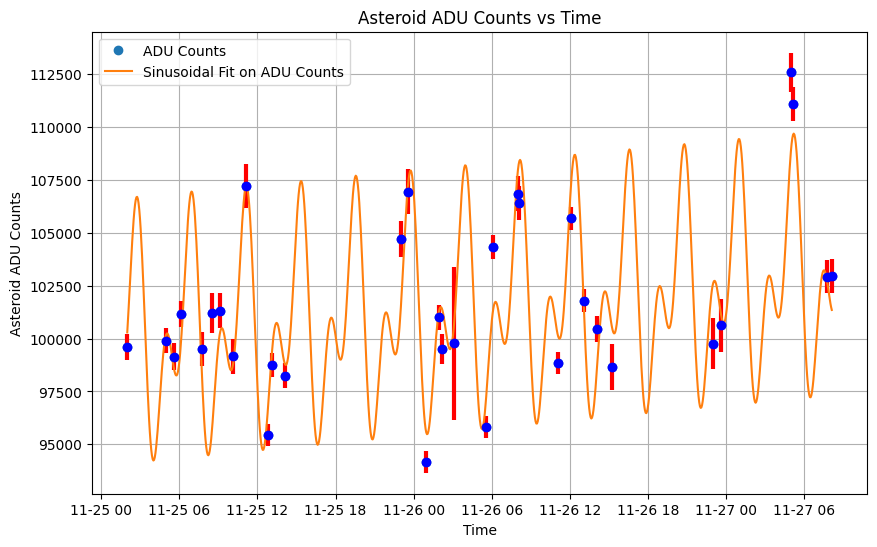

Chi-squared: 182.56230589000188
Degrees of freedom: 26
P-value: 0.0
Guess Parameters:
Amplitude Guess: 6284.8881640713225
Second Amplitude Guess: 3142.4440820356613
Period Guess: 4.0 hours
Mean Guess: 100638.71018038636
First Phase Guess: 0.0
Second Phase Guess: 0.0
Linear Trend Guess: 5000

Fitted Parameters:
Fitted Amplitude: 3904.827293784674
Fitted Second Amplitude: 3351.8161742287425
Fitted Period: 4.2029841612457535 hours
Fitted Phase 1: 0.8888919181211575 radians
Fitted Phase 2: 5.400562676350754 radians
Fitted Mean: 99848.71474829389
Fitted Linear Trend: 1419.67828907448

Fitted Parameter variances:
Amplitude Variance: 30452.945998028536
Second Amplitude Variance: 37031.743807783714
Period Variance: 5.581390599864676e-08
First Phase Variance: 0.004485135127400272
Second Phase Variance: 0.0121381096427901
Mean Variance: 67707.55440427348
Linear Trend Variance: 45248.34012911121


In [17]:
from scipy.optimize import curve_fit
def secondorderlin(t, A, B, T, phi1 , phi2, mu, a):
    return A * np.sin(2 * np.pi * t / T + phi1) + B * np.sin(4 * np.pi * t / T + phi2) + mu + a*t

#convert time_nums to numerical values in days since first observation
time_nums_days = (time_nums - time_nums[0]).total_seconds() / 86400.0

#fit
amplitude_guess = np.percentile(counts_np, 90) - np.median(counts_np)
mean_guess = np.median(counts_np)
period_days_guess = 4.0 / 24  # 4 hours in days
p0=[amplitude_guess, 
    amplitude_guess/2, 
    period_days_guess, 
    0.0, 
    0.0,
    mean_guess,
    5000]

popt, pcov = curve_fit(secondorderlin, time_nums_days, counts_np, 
                       p0, sigma=count_errors_np, absolute_sigma=True)
A_fit, B_fit, T_fit, phi1_fit, phi2_fit, mu_fit, a_fit = popt

plt.figure(figsize=(10,6))
plt.plot(time_nums, counts_np, marker='o', linestyle='', label='ADU Counts')
#add error bars
plt.errorbar(time_nums, counts_np, yerr=count_errors_np, fmt='o', color='blue', ecolor='red', elinewidth=3, capsize=0)
#plot the fit
t_fit = np.linspace(min(time_nums_days), max(time_nums_days), 1000)
flux_fit = secondorderlin(t_fit, *popt)
plt.plot(time_nums[0] + pd.to_timedelta(t_fit, unit='D'), flux_fit, '-', label='Sinusoidal Fit on ADU Counts')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Asteroid ADU Counts')
plt.title('Asteroid ADU Counts vs Time')
plt.grid(True)
plt.show()

#tests
from scipy.stats import chi2
#chi squared statistic and p-value
residuals = counts_np - secondorderlin(time_nums_days, *popt)
chi_squared = np.sum((residuals / count_errors_np) ** 2)
dof = len(counts_np) - len(popt)
p_value = 1 - chi2.cdf(chi_squared, dof)

print(f"Chi-squared: {chi_squared}")
print(f"Degrees of freedom: {dof}")
print(f"P-value: {p_value}")

print("Guess Parameters:")
print(f"Amplitude Guess: {p0[0]}")
print(f"Second Amplitude Guess: {p0[1]}")
print(f"Period Guess: {24*p0[2]} hours")
print(f"Mean Guess: {p0[5]}")
print(f"First Phase Guess: {p0[3]}")
print(f"Second Phase Guess: {p0[4]}")
print(f"Linear Trend Guess: {p0[6]}")

#show fit parameters
print("\nFitted Parameters:")
print(f"Fitted Amplitude: {A_fit}")
print(f"Fitted Second Amplitude: {B_fit}")
print(f"Fitted Period: {24*T_fit} hours")
print(f"Fitted Phase 1: {phi1_fit} radians")
print(f"Fitted Phase 2: {phi2_fit} radians")
print(f"Fitted Mean: {mu_fit}")
print(f"Fitted Linear Trend: {a_fit}")

#get variance of parameters from covariance matrix
perr = np.diag(pcov)
print("\nFitted Parameter variances:")
print(f"Amplitude Variance: {perr[0]}")
print(f"Second Amplitude Variance: {perr[1]}")
print(f"Period Variance: {perr[2]}")
print(f"First Phase Variance: {perr[3]}")
print(f"Second Phase Variance: {perr[4]}")
print(f"Mean Variance: {perr[5]}")
print(f"Linear Trend Variance: {perr[6]}")

#### Significance table

In [18]:
perr_var = np.diag(pcov)
sigma_params = np.sqrt(perr_var)

dof = len(counts_np) - len(popt)

param_names = ['A', 'B', 'T', 'phi1', 'phi2', 'mu', 'a']
from scipy import stats
for i, name in enumerate(param_names):
    val = popt[i]
    sigma = sigma_params[i]
    
    t_stat = val / sigma
    
    p_val = stats.t.sf(np.abs(t_stat), dof) * 2  # two-tailed p-value
    
    p_str = f"{p_val:.3e}" if p_val < 0.001 else f"{p_val:.4f}"
    print(f"{name}: {val:.4f} ± {sigma:.4f}, p-value = {p_str}")


A: 3904.8273 ± 174.5077, p-value = 1.640e-18
B: 3351.8162 ± 192.4363, p-value = 7.437e-16
T: 0.1751 ± 0.0002, p-value = 9.232e-58
phi1: 0.8889 ± 0.0670, p-value = 4.349e-13
phi2: 5.4006 ± 0.1102, p-value = 3.775e-27
mu: 99848.7147 ± 260.2068, p-value = 2.508e-50
a: 1419.6783 ± 212.7166, p-value = 4.428e-07


# Baysian Analysis
Assuming the errors $\sigma_i \mathop{\sim}\limits^{iid}N(0,\sigma^2)$
$$P(y_i | \Theta) = \frac{1}{\sqrt{2\pi\sigma_i^2}} \exp\left( -\frac{(y_i - M(t_i, \Theta))^2}{2\sigma_i^2} \right)$$

The log-likelihood is:

$$\ln \mathcal{L}(\Theta) = -\frac{1}{2} \sum_{i=1}^N \left[ \frac{(y_i - M(t_i, \Theta))^2}{\sigma_i^2} + \ln(2\pi\sigma_i^2) \right]$$

Prior Assumptions:

* Amplitudes must be positive
* Peroid approximately 4 hours
* Phases 0 to 2pi

Posterior:
$$\ln P(\Theta | D) = \ln \mathcal{L}(\Theta) + \ln P(\Theta) + \text{constant}$$

Running MCMC...


100%|███████████████████████████████████████████| 5000/5000 [00:48<00:00, 102.71it/s]


Done!
Total samples kept: 8512


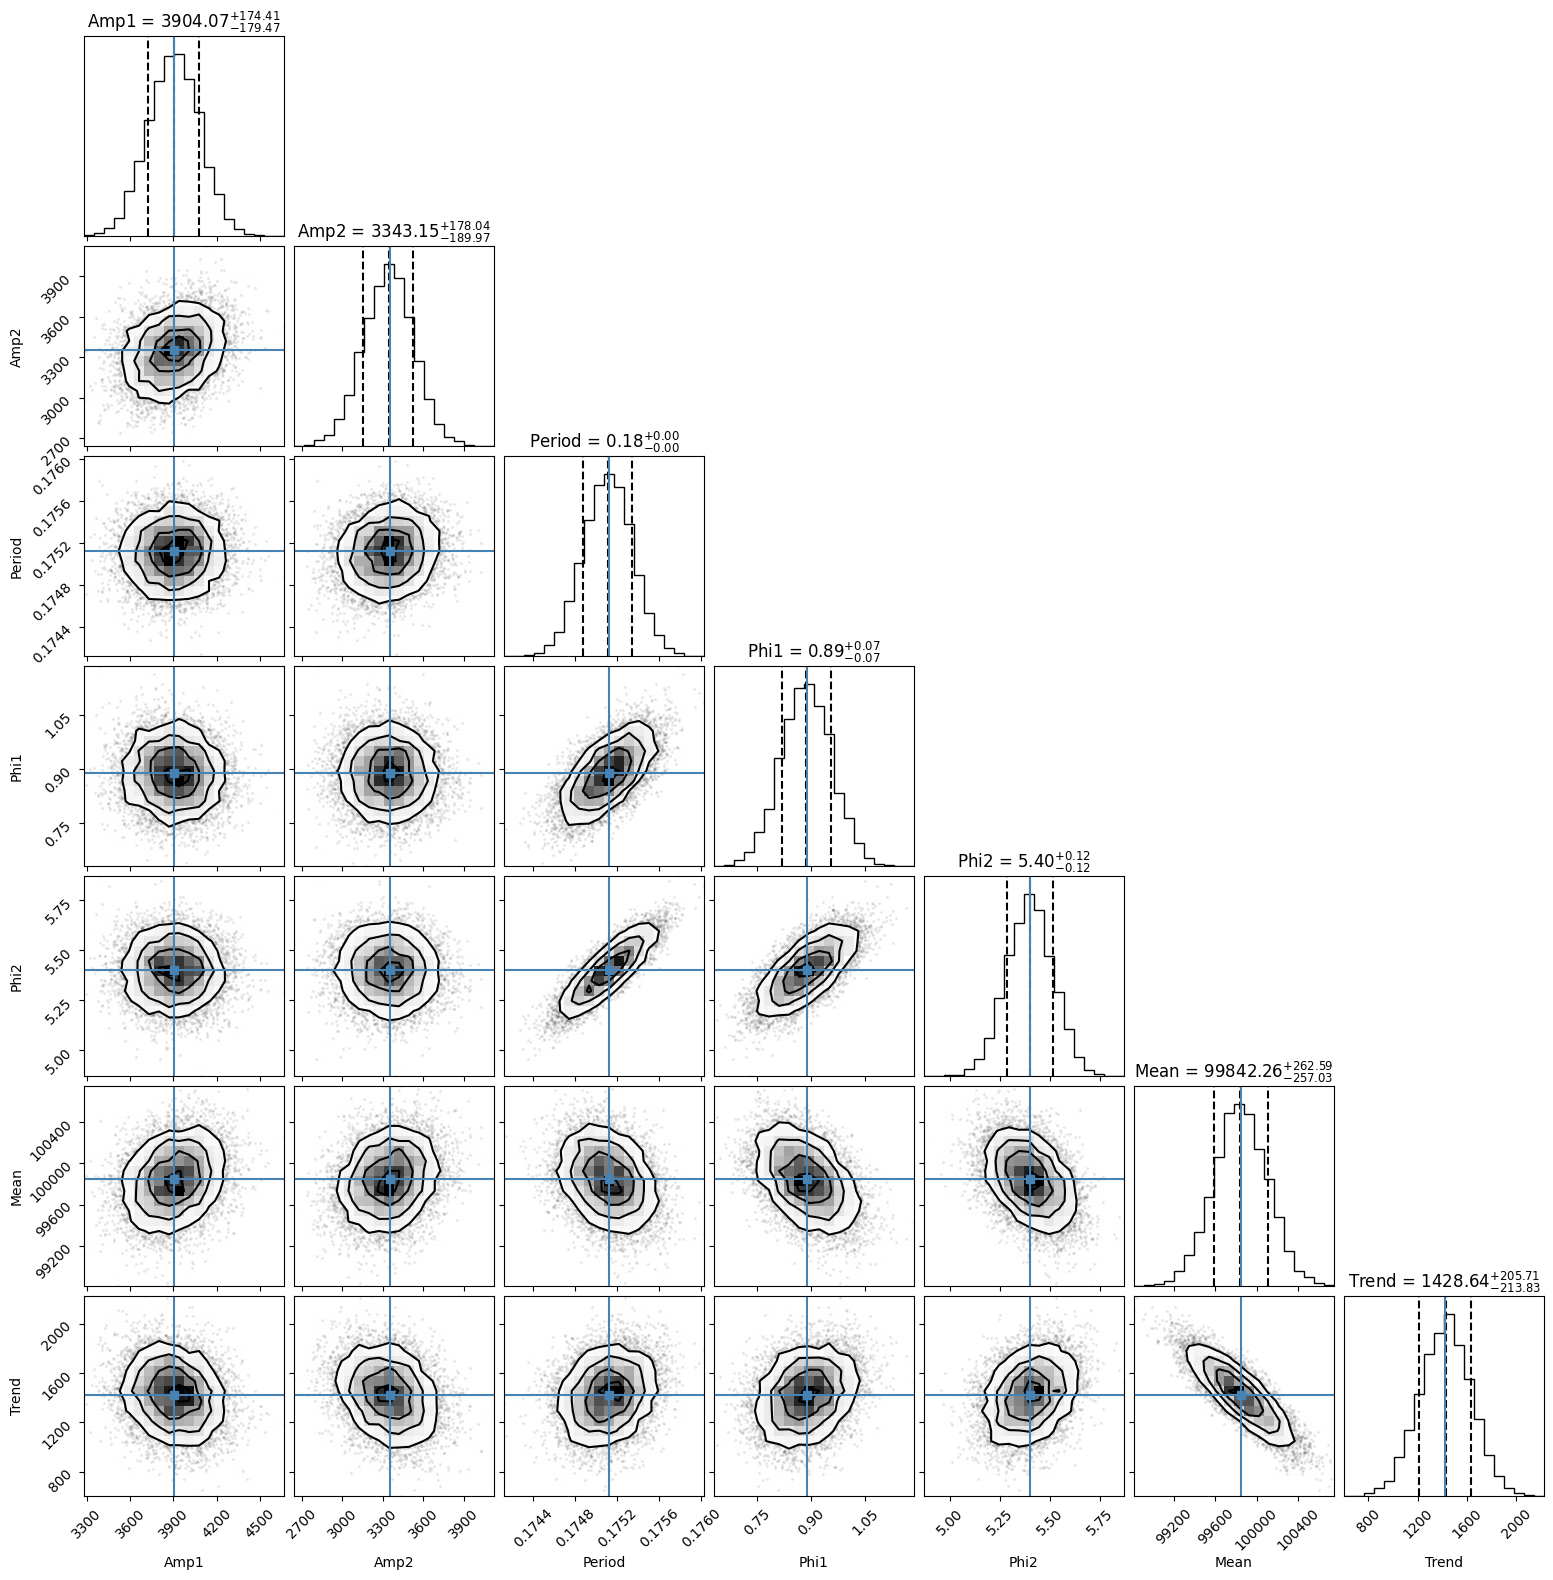

In [20]:
import numpy as np
import emcee
import corner
import matplotlib.pyplot as plt

# --- 1. Define the Model (Same as before) ---
def asteroid_model(t, theta):
    A, B, T, phi1, phi2, mu, a = theta
    omega = 2 * np.pi / T
    return (A * np.sin(omega * t + phi1) + 
            B * np.sin(2 * omega * t + phi2) + 
            mu + a * t)

# --- 2. Define Log-Prior ---
def log_prior(theta):
    A, B, T, phi1, phi2, mu, a = theta
    
    # Define physical bounds
    # Period: bound between 3 hour and 5 hours (in days)
    if not (3/24 < T < 5/24): 
        return -np.inf
    
    # Amplitudes: must be positive
    if A < 0 or B < 0:
        return -np.inf
    
    # mu must be positive
    if mu < 0:
        return -np.inf
        
    # Phases: strictly speaking, we don't bound them hard because 
    # solver might wander, but keeping them -pi to 3pi helps convergence
    if not (-np.pi < phi1 < 3 * np.pi):
        return -np.inf
    if not (-np.pi < phi2 < 3 * np.pi):
        return -np.inf
    
    # If all checks pass, return 0.0 (uniform prior)
    return 0.0

# --- 3. Define Log-Likelihood ---
def log_likelihood(theta, t, y, yerr):
    model = asteroid_model(t, theta)
    sigma2 = yerr ** 2
    
    # The Gaussian Log-Likelihood equation
    return -0.5 * np.sum((y - model) ** 2 / sigma2 + np.log(sigma2))

# --- 4. Define Log-Probability (Posterior) ---
def log_probability(theta, t, y, yerr):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, t, y, yerr)

# --- 5. Setup MCMC Sampler ---

# A. Initialize Walkers
# We start the walkers in a tiny Gaussian ball around your previous best fit (popt)
ndim = len(popt)      # 7 parameters
nwalkers = 32         # Standard number (at least 2 * ndim)
nsteps = 5000         # How many steps to take

# Perturb the starting position slightly so walkers explore distinct paths
pos = popt + 1e-4 * np.random.randn(nwalkers, ndim)

# B. Run the Sampler
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(time_nums_days, counts_np, count_errors_np))

print("Running MCMC...")
sampler.run_mcmc(pos, nsteps, progress=True)
print("Done!")

# --- 6. Analyze Results ---

# A. Discard "Burn-in"
# The walkers take time to find the groove. We usually toss the first 20-30%
discard = 1000
thin = 15  # Save every 15th step to de-correlate samples
flat_samples = sampler.get_chain(discard=discard, thin=thin, flat=True)

print(f"Total samples kept: {flat_samples.shape[0]}")

# B. The Corner Plot (The "Money Plot")
# This visualizes the Posterior Distributions and Covariances
labels = ['Amp1', 'Amp2', 'Period', 'Phi1', 'Phi2', 'Mean', 'Trend']

fig = corner.corner(
    flat_samples, 
    labels=labels, 
    truths=popt,
    quantiles=[0.16, 0.5, 0.84], # Show 1-sigma ranges
    show_titles=True, 
    title_kwargs={"fontsize": 12}
)
plt.show()